# LSE for Damped Harmonic Oscillator
## FLOW/INTERFACE Winter School, Dec. 2019
S. Rezaeiravesh, salehr@kth.se

In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Define the model function for damped harmonic oscillator:
## $$
\begin{cases}
\ddot{y} + C\dot{y}+K y=0,\\
y(0)=y_0,\, \dot{y}(0)=v_0
\end{cases}
$$
## With the exact solution, 
## $$
y(t)=e^{-\frac{C}{2}t}\left(
c_1 \cos\omega t + c_2\sin\omega t)
\right)
$$
## $$
\omega=\sqrt{K-C^2/4},\,
c_1=y_0,\, c_2=(v_0+Cy_0/2)/\omega
$$



In [2]:
def modelFunc(t,C,K):
    """
        model function for harmonic oscillation                    
    """
    #C damping coeffcient
    #K spring constant
    y0=0   #initial location
    v0=1.0 #initial velocity    
    tmp=K-C**2./4.
    if (tmp>=0):
       freq=mt.sqrt(tmp)
    else:
       print('Overdamped case!')
    c2=(v0+C*y0/2.)/freq
    y=np.exp(-C*t/2)*(y0*np.cos(freq*t)+c2*np.sin(freq*t))
    return y

## Synthetic data generator

## $$
Y_{{\rm obs}_i} = f(t_i,C_0,K_0) + \varepsilon_i,\quad i=1,2\cdots,n\,, \quad \varepsilon_i\sim\mathcal{N}(0,\sigma_0^2)
$$

In [3]:
def syntData(q0,sigma0,tEnd,N):
    """
       Generate Synthetic Data for damped harmonic oscillator
         Y_obs=Y_True + epsilon, epsilon~N(0,sigma)
         q0=list of true parameters, see below
         sigma0=true sdev of measurement noise
         tEnd= final time
         N: number of data samples
    """
    #True parameter values                                                             
    C0=q0[0]
    K0=q0[1]
    y0=0.0
    v0=1.0
    t=np.linspace(0.0,tEnd,N)
    #Generate measured data                                                             
    yTrue=modelFunc(t,C0,K0)
    y=yTrue+np.random.normal(0,sigma0,N)
    data={'t':t,'y':y}    
    return data

## Least-squares estimator for $\Theta={C,K}$

In [4]:
def OLS_harmonicOscill(data,nTest,nParSample):
    """ 
       OLS estimators for harmonic oscillator parameters to estimate C,K
    """
    #1.Estimate parameters using nonlinear Least-squares
    t=data['t']
    y=data['y']
    parInit=[0.5,5]   #intial Guess for parameters
    parMean,covPar=curve_fit(modelFunc,t,y,parInit)
    #2.Draw and scatterplot of samples from the Joint PDF: multivariate Gaussian of the estimated parameters
    qSample=np.random.multivariate_normal(parMean,covPar,[nParSample])
    #3.Plot the fitted curve 
    tTest=np.linspace(0,tEnd,nTest)
    C_=parMean[0]
    K_=parMean[1]
    yTest=modelFunc(tTest,C_,K_)
    plt.figure(figsize=[8,5])
    for i in range(qSample.shape[0]):
        yTestSample=modelFunc(tTest,qSample[i,0],qSample[i,1])
        plt.plot(tTest,yTestSample,'-',color='skyblue',lw=2,alpha=0.4)
    plt.plot(t,y,'or',markersize=5,label='Measured Data')
    plt.plot(tTest,yTest,'-b',lw=2,label=r'$y(t,\bar{\Theta})$')
    plt.legend(loc='best',fontsize=19)
    plt.xlabel(r'$t$',fontsize=27)
    plt.ylabel(r'$y$',fontsize=27)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.show()  
    return parMean,covPar

## Generate synthetic data and estimate the uncertain parameters
## Task 1. Given estimated mean and covariance matrix for $\Theta$, construct 95% confidence interval for them

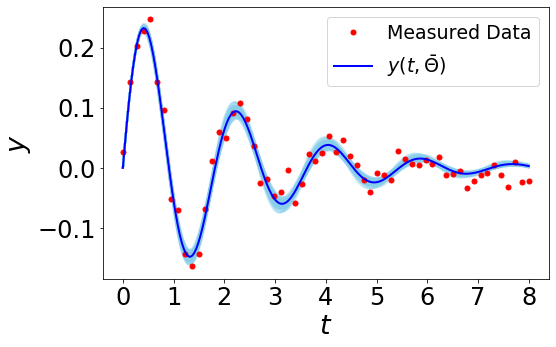

mean parameters estim. by LSE=  [ 0.99567085 12.21376975]
covariance matrix by LSE= 
[[ 2.42933532e-03 -2.25983496e-05]
 [-2.25983496e-05  2.74705062e-02]]


In [6]:
#------- SETTINGS ---------------------
#settings for snynthetic data
nData=60    #number of observed data
sigma=0.02  #satndard-deviation of the measurement error
C_true=1.0  #C0
K_true=12.0 #K0
tEnd=8.0    # end time for observed data
#--------------------------------------    
#--------------------------------------  
#1. Generate synthetic data
data=syntData([C_true,K_true],sigma,tEnd,nData)
#2. Use LSE to estimate and construct confidence intervals
parMean,covPar=OLS_harmonicOscill(data,nTest=200,nParSample=100)
print('mean parameters estim. by LSE= ',parMean)
print('covariance matrix by LSE= ')
print(covPar)    

#3. Task: Construct 95% confidence intervals for the estimated parameters
#???